In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import numpy as np

def summation_unit(inputs, weights, bias=3):
    return np.dot(inputs, weights) + bias

summation_unit([10,15],[2,3])


68

In [4]:
def step_function(x):
    #step function
    return 1 if x >= 0 else 0

step_function(100)

1

In [5]:
def bipolar_function(x):
    #bipolar function
    if (x>=0):
        return 1    
    else:
        return -1
    
bipolar_function(90)

1

In [6]:
def tanh_function(x):
    #tanh function
    return np.tanh(x)

tanh_function(-200)

-1.0

In [7]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

sigmoid_function(0)

0.5

In [8]:
def ReLu(x):
    if x>0:
        return x
    else:
        return 0

ReLu(-200)

0

In [9]:
def leaky_relu_function(x, alpha=0.01):
    if x>0:
        return x
    else:
        return alpha*x

leaky_relu_function(-2)

-0.02

In [11]:
LEARNING_RATE = 0.05
MAX_EPOCHS = 1000
CONVERGENCE_ERROR = 0.002

In [12]:
def comparator_unit(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

def train_perceptron(x, y, activation_function, initial_weights):
    """
    Train the perceptron using the specified activation function.
    
    Parameters:
    # X: Input data (numpy array)
    # y: Target labels (numpy array)
    - activation_function: Activation function to use
    - initial_weights: Initial weights (numpy array)
    
    Returns:
    - weights: Final weights after training (numpy array)
    - epoch_errors: List of errors at each epoch (list)
    - epochs: Number of epochs taken to converge (int)
    """
    weights = initial_weights.copy()  # Initialize weights
    epoch_errors = []  # List to store errors
    for epoch in range(MAX_EPOCHS):
        total_error = 0  # Initialize total error for this epoch
        for inputs, target in zip(x, y):
            weighted_sum = summation_unit(inputs, weights)
            if activation_function == 'step':
                prediction = step_function(weighted_sum)
            elif activation_function == 'bipolar_step':
                prediction = bipolar_function(weighted_sum)
            elif activation_function == 'sigmoid':
                prediction = sigmoid_function(weighted_sum)
            elif activation_function == 'tanh':
                prediction = tanh_function(weighted_sum)
            elif activation_function == 'relu':
                prediction = ReLu(weighted_sum)
            elif activation_function == 'leaky_relu':
                prediction = leaky_relu_function(weighted_sum)
            else:
                raise ValueError("Invalid activation function specified.")

            # Update weights based on prediction error
            error = target - prediction
            total_error += error ** 2
            weights += LEARNING_RATE * error * inputs  # Update weights

        # Calculate sum-squared error for the epoch
        epoch_errors.append(total_error)
        if total_error <= CONVERGENCE_ERROR:
            break  # Stop if convergence is achieved

    return weights, epoch_errors, epoch + 1  # Return final weights, errors, and epochs

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_errors(epoch_errors, activation_function):
    """
    Plot the errors over epochs.
    
    Parameters:
    - epoch_errors: List of errors at each epoch (list)
    - activation_function: Activation function used (str)
    
    Returns:
    - None
    """
    plt.plot(epoch_errors)
    plt.title(f'Error vs Epochs - {activation_function.capitalize()} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.grid()
    plt.show()

Activation: step, Final Weights: [ 4.6   0.05 -7.65], Epochs: 119


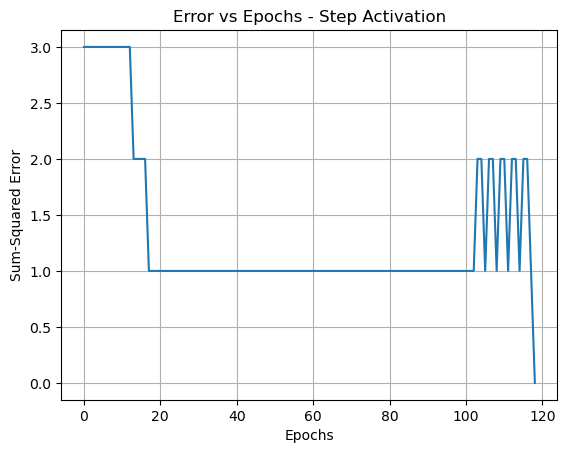

Activation: bipolar_step, Final Weights: [ 0.2   0.1  -3.05], Epochs: 1000


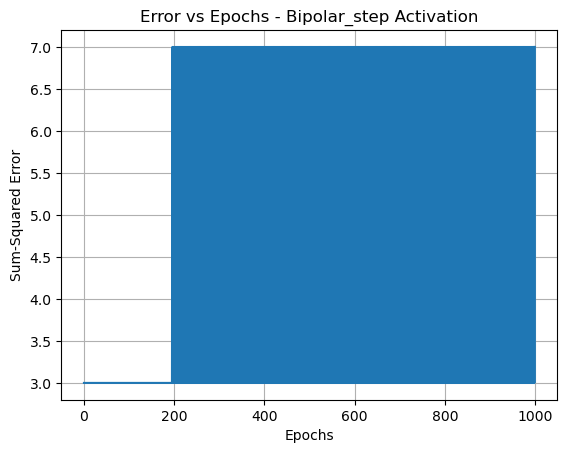

Activation: sigmoid, Final Weights: [  4.95255821   4.82566593 -10.51183887], Epochs: 1000


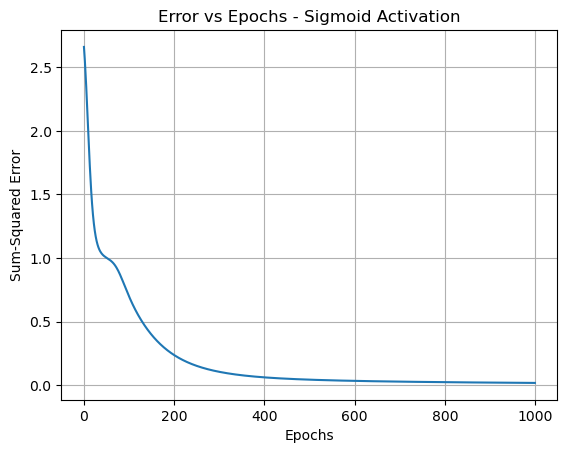

Activation: tanh, Final Weights: [ 0.61849249  0.60350493 -3.30924625], Epochs: 1000


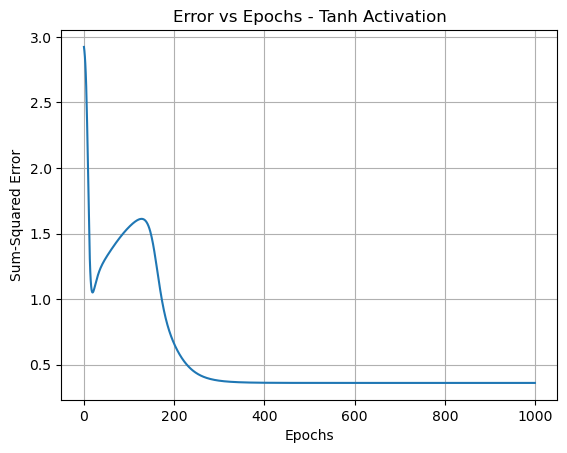

Activation: relu, Final Weights: [ 4.04176916  0.94219795 -7.00714753], Epochs: 177


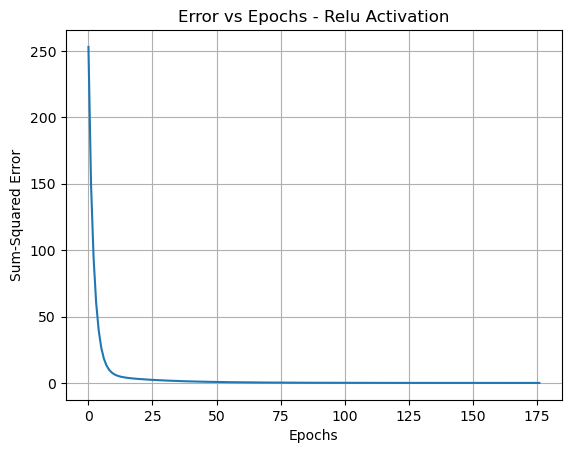

Activation: leaky_relu, Final Weights: [ 3.19336876  1.01655077 -6.19122369], Epochs: 539


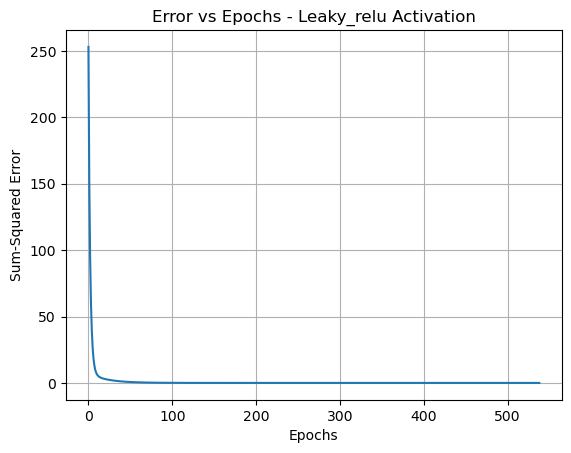

In [15]:
# Define initial weights
initial_weights = np.array([10, 0.2, -0.75])  # W0, W1, W2

# Define training data for AND gate
x_and = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y_and = np.array([0, 0, 0, 1])  # Outputs

# Train perceptron for AND gate with different activation functions
activation_functions = ['step', 'bipolar_step', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
for activation in activation_functions:
    final_weights, epoch_errors, epochs = train_perceptron(x_and, y_and, activation, initial_weights)
    print(f'Activation: {activation}, Final Weights: {final_weights}, Epochs: {epochs}')
    plot_errors(epoch_errors, activation)

Activation: step, Final Weights: [-7.64666108e-15 -5.00000000e-02 -3.00000000e+00], Epochs: 1000


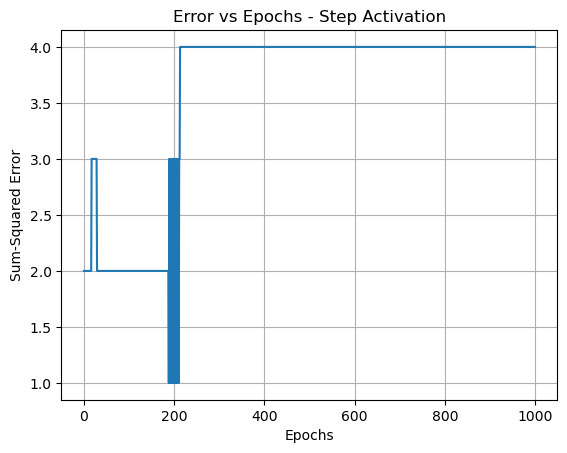

Activation: bipolar_step, Final Weights: [-1.00000000e-01 -2.35922393e-16 -2.95000000e+00], Epochs: 1000


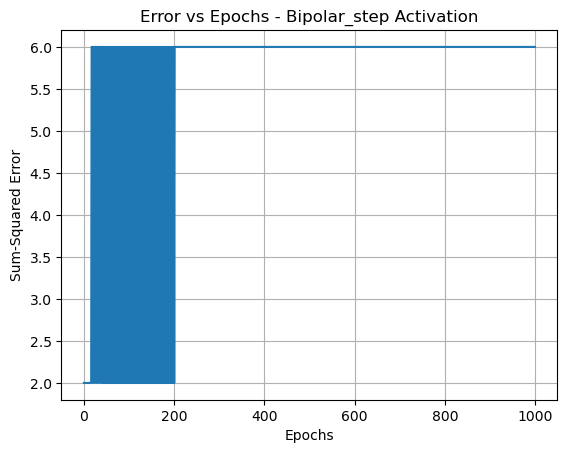

Activation: sigmoid, Final Weights: [-0.04907468 -0.02385723 -2.97650093], Epochs: 1000


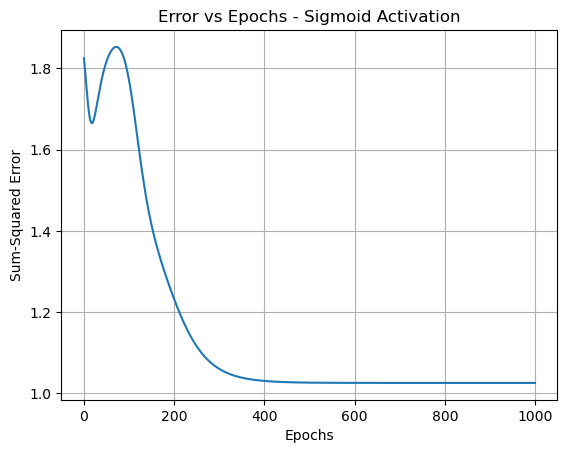

Activation: tanh, Final Weights: [-0.05194725 -0.02597363 -2.4243829 ], Epochs: 1000


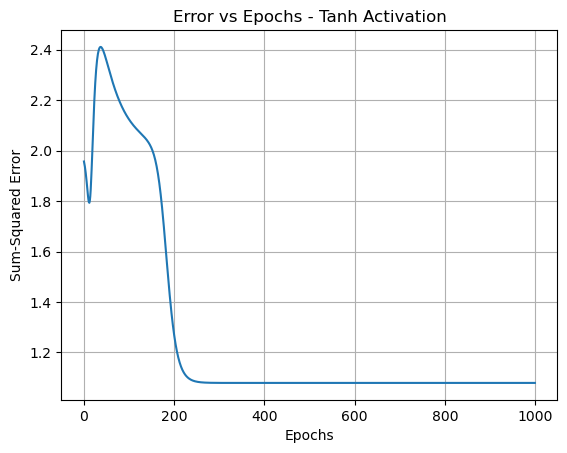

Activation: relu, Final Weights: [-0.05263158 -0.02631579 -2.47368421], Epochs: 1000


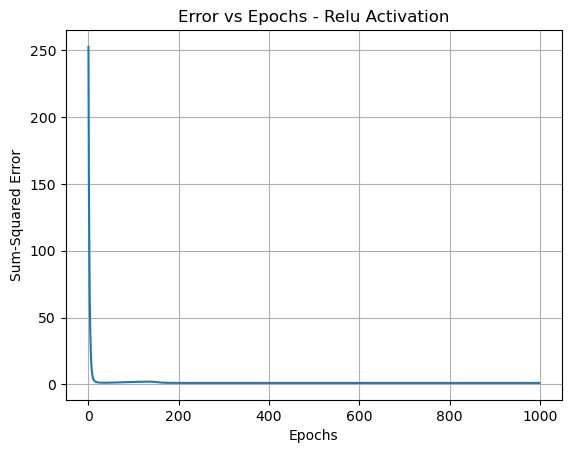

Activation: leaky_relu, Final Weights: [-0.05263158 -0.02631579 -2.47368421], Epochs: 1000


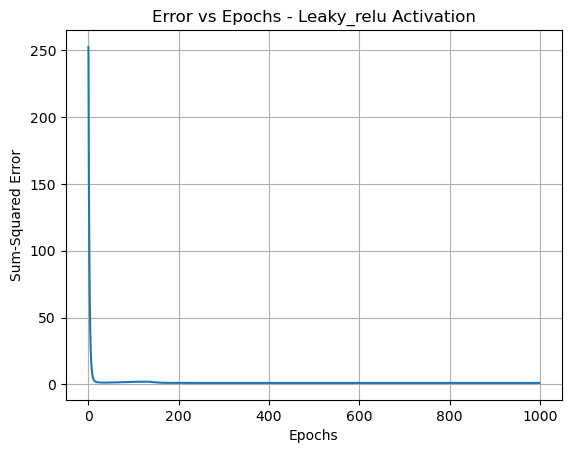

In [16]:
# Define training data for XOR gate
x_xor = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y_xor = np.array([0, 1, 1, 0])  # Outputs

# Train perceptron for XOR gate with different activation functions
for activation in activation_functions:
    final_weights, epoch_errors, epochs = train_perceptron(x_xor, y_xor, activation, initial_weights)
    print(f'Activation: {activation}, Final Weights: {final_weights}, Epochs: {epochs}')
    plot_errors(epoch_errors, activation)

In [17]:
def sigmoid(x):
    """
    Sigmoid activation function.
    
    Parameters:
    - x: Input value (float or numpy array)
    
    Returns:
    - Sigmoid output (float or numpy array)
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of the sigmoid function.
    
    Parameters:
    - x: Input value (float or numpy array)
    
    Returns:
    - Derivative output (float or numpy array)
    """
    return x * (1 - x)

In [18]:
def train_perceptron(x, y, initial_weights):
    """
    Train the perceptron using the sigmoid activation function.
    
    Parameters:
    - X: Input data (numpy array)
    - y: Target labels (numpy array)
    - initial_weights: Initial weights (numpy array)
    
    Returns:
    - weights: Final weights after training (numpy array)
    - epoch_errors: List of errors at each epoch (list)
    - epochs: Number of epochs taken to converge (int)
    """
    weights = initial_weights.copy()  # Initialize weights
    epoch_errors = []  # List to store errors
    for epoch in range(MAX_EPOCHS):
        total_error = 0  # Initialize total error for this epoch
        for inputs, target in zip(x, y):
            weighted_sum = summation_unit(inputs, weights)
            prediction = sigmoid(weighted_sum)
            
            # Calculate error
            error = target - prediction
            total_error += error ** 2
            
            # Update weights
            weights += LEARNING_RATE * error * sigmoid_derivative(prediction) * inputs

        # Calculate average error for the epoch
        epoch_errors.append(total_error / len(y))
        if total_error / len(y) <= CONVERGENCE_ERROR:
            break  # Stop if convergence is achieved

    return weights, epoch_errors, epoch + 1  # Return final weights, errors, and epochs

In [19]:
def plot_errors(epoch_errors):
    """
    Plot the errors over epochs.
    
    Parameters:
    - epoch_errors: List of errors at each epoch (list)
    
    Returns:
    - None
    """
    plt.plot(epoch_errors)
    plt.title('Error vs Epochs - Sigmoid Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Average Error')
    plt.grid()
    plt.show()

Final Weights: [0.46633643 0.81624144 0.99036215 0.6582152 ]
Epochs: 1000


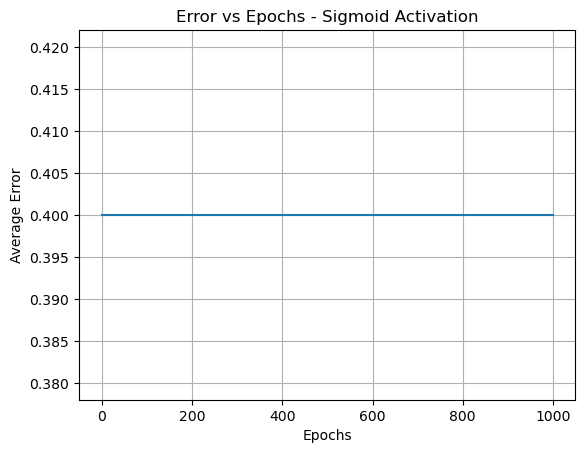

In [20]:
# Customer data
# Candies, Mangoes, Milk Packets, Payment, High Value Transaction (1 for Yes, 0 for No)
data = np.array([
    [20, 6, 2, 386, 1],  # C_1
    [16, 3, 6, 289, 1],  # C_2
    [27, 6, 2, 393, 1],  # C_3
    [19, 1, 2, 110, 0],  # C_4
    [24, 4, 2, 280, 1],  # C_5
    [22, 1, 5, 167, 0],  # C_6
    [15, 4, 2, 271, 1],  # C_7
    [18, 4, 2, 274, 1],  # C_8
    [21, 1, 4, 148, 0],  # C_9
    [16, 2, 4, 198, 0]   # C_10
])

# Split data into inputs and outputs
x = data[:, :-1]  # Features (Candies, Mangoes, Milk Packets, Payment)
y = data[:, -1]   # Target (High Value Transaction)

# Initialize weights (including bias)
initial_weights = np.random.rand(x.shape[1])  # Random initialization of weights

# Train the perceptron
final_weights, epoch_errors, epochs = train_perceptron(x, y, initial_weights)

# Print final weights and epochs
print(f'Final Weights: {final_weights}')
print(f'Epochs: {epochs}')

# Plot the error over epochs
plot_errors(epoch_errors)

In [21]:
# Customer data
data = np.array([
    [20, 6, 2, 386, 1],  # C_1
    [16, 3, 6, 289, 1],  # C_2
    [27, 6, 2, 393, 1],  # C_3
    [19, 1, 2, 110, 0],  # C_4
    [24, 4, 2, 280, 1],  # C_5
    [22, 1, 5, 167, 0],  # C_6
    [15, 4, 2, 271, 1],  # C_7
    [18, 4, 2, 274, 1],  # C_8
    [21, 1, 4, 148, 0],  # C_9
    [16, 2, 4, 198, 0]   # C_10
])

# Split data into inputs and outputs
x = data[:, :-1]  # Features (Candies, Mangoes, Milk Packets, Payment)
y = data[:, -1]   # Target (High Value Transaction)

# Perceptron Learning
initial_weights = np.random.rand(x.shape[1])
learning_rate = 0.1
max_epochs = 1000
convergence_error = 0.002

weights = initial_weights.copy()
for epoch in range(max_epochs):
    total_error = 0
    for inputs, target in zip(x, y):
        prediction = 1 if np.dot(inputs, weights) > 0 else 0
        error = target - prediction
        total_error += error ** 2
        weights += learning_rate * error * inputs
    if total_error / len(y) <= convergence_error:
        break

print("Perceptron Learning:")
print(f"Final Weights: {weights}")
print(f"Epochs: {epoch + 1}")

# Matrix Pseudo-Inverse
x_augmented = np.c_[np.ones(len(x)), x]
weights_pinv = np.linalg.pinv(x_augmented) @ y

print("\nMatrix Pseudo-Inverse:")
print(f"Weights: {weights_pinv}")

Perceptron Learning:
Final Weights: [-578.86477394   93.94506476 -249.98825008   50.73401078]
Epochs: 721

Matrix Pseudo-Inverse:
Weights: [ 0.1139903  -0.02789923  0.01473739 -0.04323249  0.00447248]


Final Weights: [-0.48111507 -0.46804926 -2.38386026]
Epochs: 1000


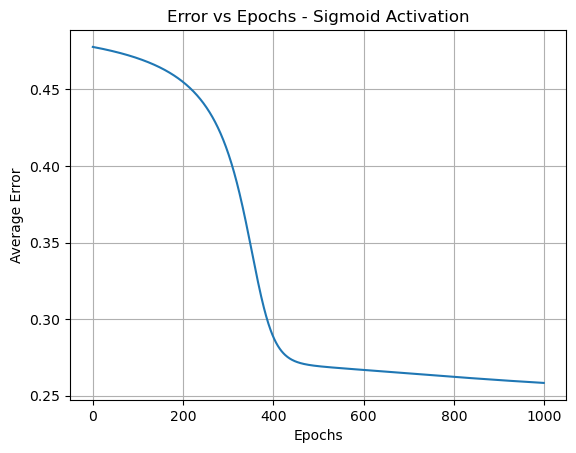

In [22]:
# Define training data for XOR gate
x = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y = np.array([0, 1, 1, 0])  # Outputs

# Initialize weights (including bias)
initial_weights = np.random.rand(x.shape[1])  # Random initialization of weights

# Train the perceptron
final_weights, epoch_errors, epochs = train_perceptron(x, y, initial_weights)

# Print results
print(f'Final Weights: {final_weights}')
print(f'Epochs: {epochs}')

# Plot the error over epochs
plot_errors(epoch_errors)

In [23]:
def train_neural_network(x, y, hidden_neurons):
    """Train the neural network using backpropagation."""
    # Initialize weights randomly
    weights_ih = np.random.rand(x.shape[1], hidden_neurons)  # Input to Hidden Layer
    weights_ho = np.random.rand(hidden_neurons, y.shape[1])  # Hidden to Output Layer
    
    epoch_errors = []
    for epoch in range(MAX_EPOCHS):
        total_error = 0
        
        # Forward propagation
        hidden_inputs = np.dot(x, weights_ih)
        hidden_outputs = sigmoid(hidden_inputs)
        output_inputs = np.dot(hidden_outputs, weights_ho)
        output = sigmoid(output_inputs)
        
        # Calculate error
        error = y - output
        total_error += np.sum(error ** 2)
        
        # Backpropagation
        delta_output = error * sigmoid_derivative(output)
        delta_hidden = np.dot(delta_output, weights_ho.T) * sigmoid_derivative(hidden_outputs)
        
        # Update weights
        weights_ho += LEARNING_RATE * np.dot(hidden_outputs.T, delta_output)
        weights_ih += LEARNING_RATE * np.dot(x.T, delta_hidden)
        
        epoch_errors.append(total_error / len(y))
        if total_error / len(y) <= CONVERGENCE_ERROR:
            break
    
    return weights_ih, weights_ho, epoch_errors, epoch + 1

Weights (Input to Hidden): [[-1.34138413  0.67746677]
 [-1.34825217  0.79228803]
 [ 1.17624699  1.49987044]]
Weights (Hidden to Output): [[ 1.46786904 -1.91703833]
 [ 0.39035628 -0.11636398]]
Epochs: 1000


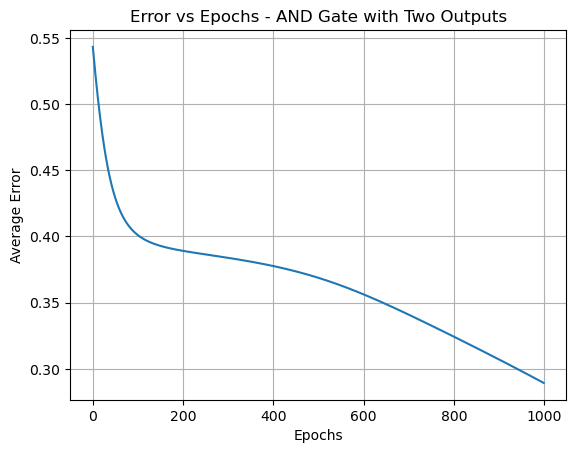

In [24]:
# Define training data for AND gate with two output nodes
x = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Outputs for AND gate

# Train the neural network
weights_ih, weights_ho, epoch_errors, epochs = train_neural_network(x, y, hidden_neurons=2)

# Print results
print(f"Weights (Input to Hidden): {weights_ih}")
print(f"Weights (Hidden to Output): {weights_ho}")
print(f"Epochs: {epochs}")

# Plot the error over epochs
plt.plot(epoch_errors)
plt.title('Error vs Epochs - AND Gate with Two Outputs')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.grid()
plt.show()

In [25]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Define training data for AND gate
x_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y_and = np.array([0, 0, 0, 1])  # Outputs

# Create MLPClassifier instance
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
mlp_and.fit(x_and, y_and)

# Evaluate the model
print("AND Gate Results:")
print("Weights (Input to Hidden):", mlp_and.coefs_[0])  # Weights from input to hidden layer
print("Weights (Hidden to Output):", mlp_and.coefs_[1])  # Weights from hidden to output layer
print("Predictions:", mlp_and.predict(x_and))

AND Gate Results:
Weights (Input to Hidden): [[-1.30648632  1.40023777]
 [-0.78118408  1.09684355]]
Weights (Hidden to Output): [[-1.58331314]
 [ 0.37931475]]
Predictions: [0 0 0 0]


/opt/anaconda3/envs/may/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# Define training data for XOR gate
x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y_xor = np.array([0, 1, 1, 0])  # Outputs

# Create MLPClassifier instance
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
mlp_xor.fit(x_xor, y_xor)

# Evaluate the model
print("\nXOR Gate Results:")
print("Weights (Input to Hidden):", mlp_xor.coefs_[0])  # Weights from input to hidden layer
print("Weights (Hidden to Output):", mlp_xor.coefs_[1])  # Weights from hidden to output layer
print("Predictions:", mlp_xor.predict(x_xor))


XOR Gate Results:
Weights (Input to Hidden): [[-0.16251362  0.62255882]
 [ 0.3428559   0.12469425]]
Weights (Hidden to Output): [[-0.73646257]
 [ 0.58315243]]
Predictions: [1 1 1 1]


In [27]:
import pandas as pd

# Customer data
data = pd.read_csv('English_Abstractive.csv')

# Split data into inputs and outputs
x_custom = data.iloc[:, :-1]  # Features
y_custom = data['Judgement Status']   # Target 

# Create MLPClassifier instance
mlp_custom = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
mlp_custom.fit(x_custom, y_custom)

# Evaluate the model
print("\n Dataset Results:")
print("Weights (Input to Hidden):", mlp_custom.coefs_[0])  # Weights from input to hidden layer
print("Weights (Hidden to Output):", mlp_custom.coefs_[1])  # Weights from hidden to output layer
print("Predictions:", mlp_custom.predict(x_custom))


 Dataset Results:
Weights (Input to Hidden): [[-0.12512663  0.98320531 -1.60986819  0.44305773  1.71446906]
 [-0.95696618 -1.51123074 -0.82040663  1.24985391  0.20416175]
 [-0.63282452  0.07737658 -0.20596005 -0.06462692  0.81032023]
 ...
 [ 0.02968094 -0.09207051 -0.10256124  0.10709227 -0.02199727]
 [ 0.66619232  0.11852316 -0.26881575  0.44730229 -0.64511891]
 [ 0.29889283 -0.29902714  0.10098552  0.21037384 -0.24468389]]
Weights (Hidden to Output): [[-1.4898685   1.15261954  0.65077332 -0.58133276]
 [-0.91355589  1.91014175 -0.68949023  0.00221758]
 [-1.73533439 -0.92959177 -0.46673922  1.52346298]
 [ 1.04089337 -0.93979755  1.77987896 -1.46565178]
 [ 2.04278876  0.13977059 -2.00627497 -0.39945193]]
Predictions: [1 0 0 1 1 1 0 1 1 1 0 1 0 3 0 0 1 0 1 1 0 1 1 1 2 0 0 0 1 0 0 1 1 1 1 1 1
 1 2 1 1 1 0 1 2 1 1 1 0 3 1 1 1 1 0 3 0 1 0 3 1 1 3 1 1 0 1 0 1 1 0 0 0 0
 1 0 2 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 3 0 0 0 3 0 1 1 1
 2 0 1 0 0 1 0 0 1 0 1 1 2 0 0 1 1 0 0 1 1 1 0 1

/opt/anaconda3/envs/may/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
